In [57]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib as mpl
from collections import Counter
from operator import itemgetter
from scipy.interpolate import make_interp_spline

In [64]:
class DataVisualization:
    def __init__(self):
        pass
        
    def extract_data(self, name):
        self.name = name
        journal_list = []
        year_list = []
        with open(name, 'r') as f:
            for line in f.readlines():
                if '**[' in line:
                    content = re.search('\[(.*)\]', line).group(1)
                    year = re.search('\d+', content).group()
                    journal = re.search('\D+', content).group()[:-1]
                    journal_list.append(journal)
                    year_list.append(year) 
        return journal_list, year_list
   
    def get_dummies(self, journal_list, year_list):
        self.journal = Counter(journal_list).items()
        self.journal = sorted(self.journal, key=itemgetter(1), reverse=True)
        self.year = Counter(year_list).items()
        self.year = sorted(self.year, key=itemgetter(0), reverse=False)
        self.count_journal = len(self.journal)
        self.count_year = len(self.year)
        
        
    def journal_bar_plot(self, color):
        cmap = mpl.cm.get_cmap(color, self.count_journal)
        colors = cmap(np.linspace(0, 1, self.count_journal))
        fig = plt.figure(figsize=(20,10))
        labels, values = zip(*self.journal)
        plt.bar(labels, values, color = colors) 
        plt.xticks(rotation=90)
        plt.title("Ammounts of journals and booktitles used for "+ self.name[:-3], fontsize=20)
        plt.tick_params(labelsize=15)
        plt.show()
    
    def year_line_chart(self, color):
        plt.figure(figsize = (20,10))
        labels, values = zip(*self.year)
        labels = list(int(year) for year in labels)
        x_smooth = np.linspace(min(labels), max(labels), 500) 
        y_smooth = make_interp_spline(labels, values)(x_smooth)
        plt.plot(x_smooth, y_smooth, color=color, linewidth=1)
        plt.title("Published year of paper used for " + self.name[:-3], fontsize = 18)
        plt.tick_params(labelsize = 15)
        plt.xticks(rotation = 60)
        x_major_locator = MultipleLocator(2)
        ax = plt.gca()
        ax.xaxis.set_major_locator(x_major_locator)
        plt.show()

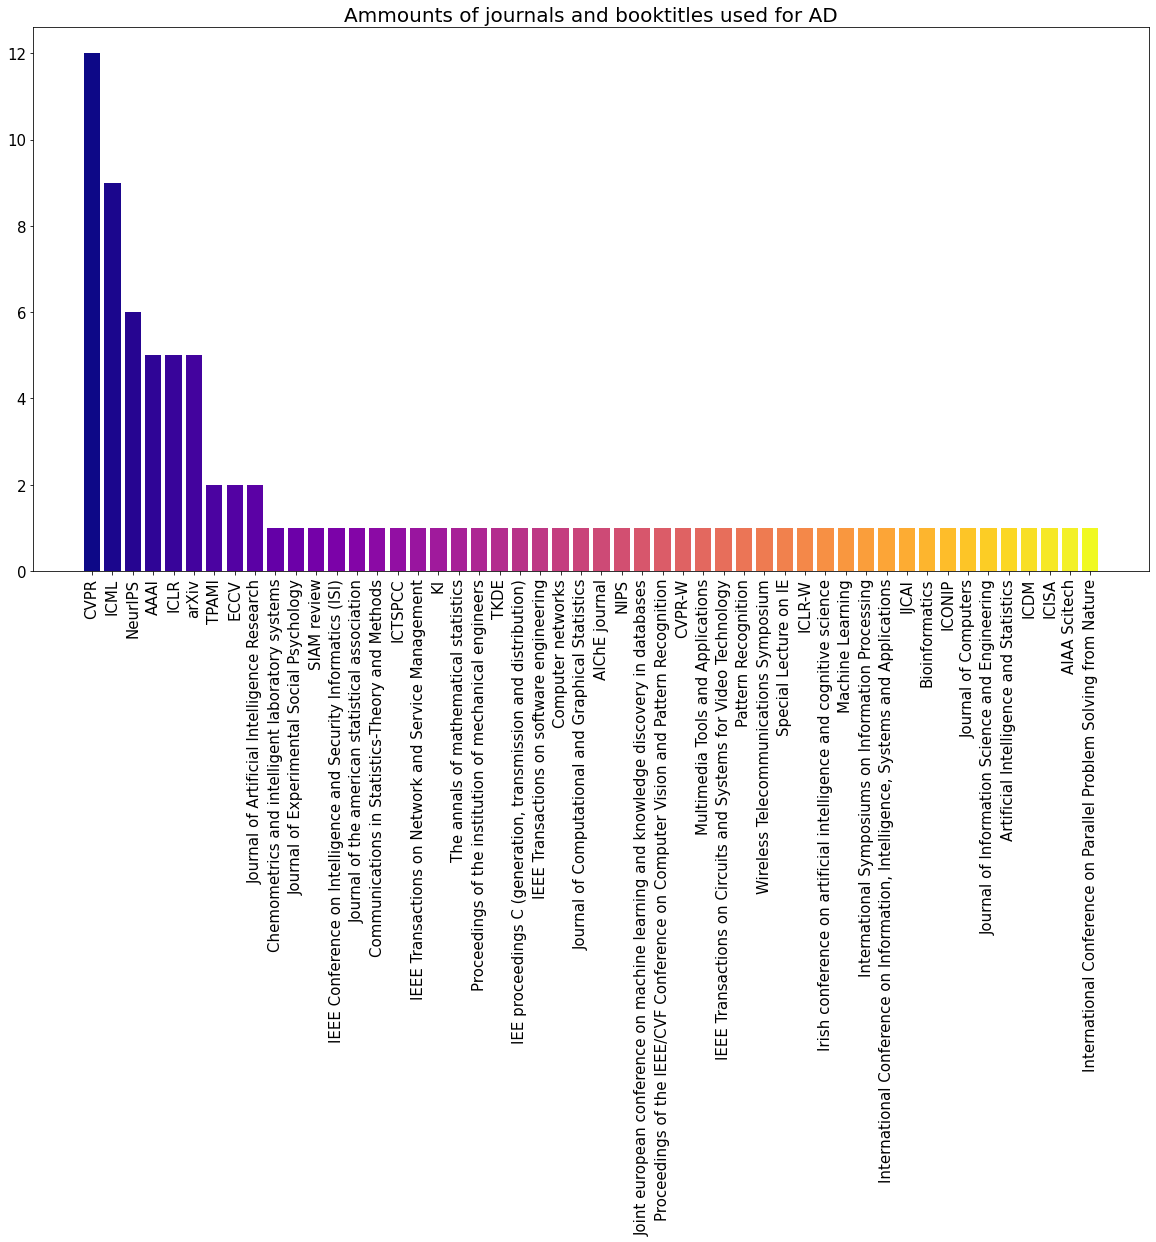

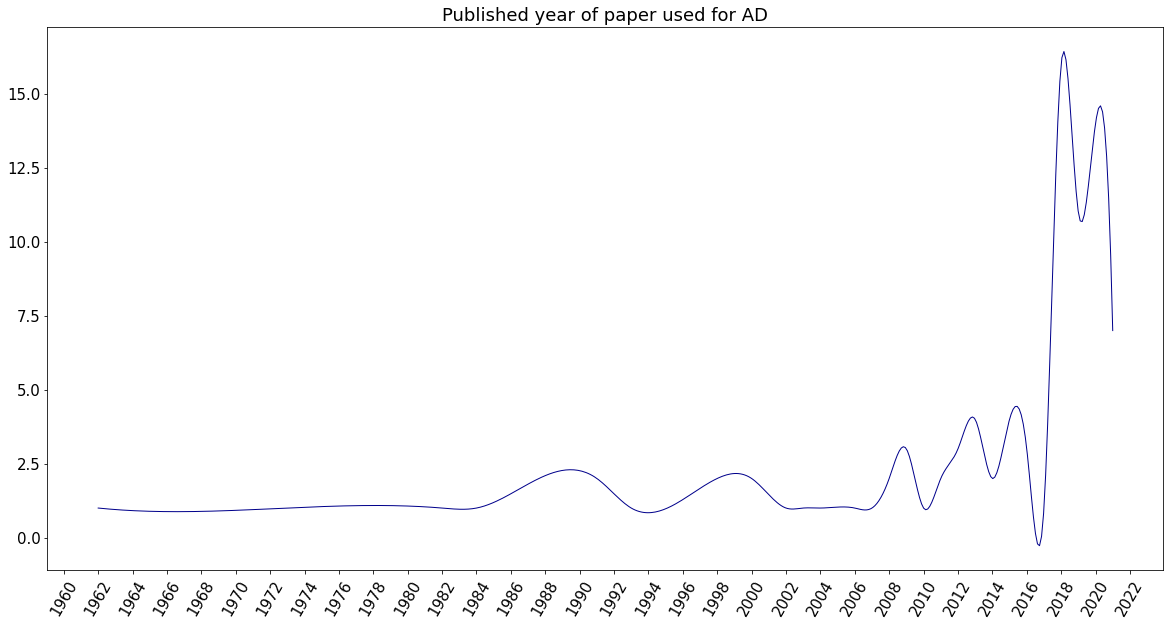

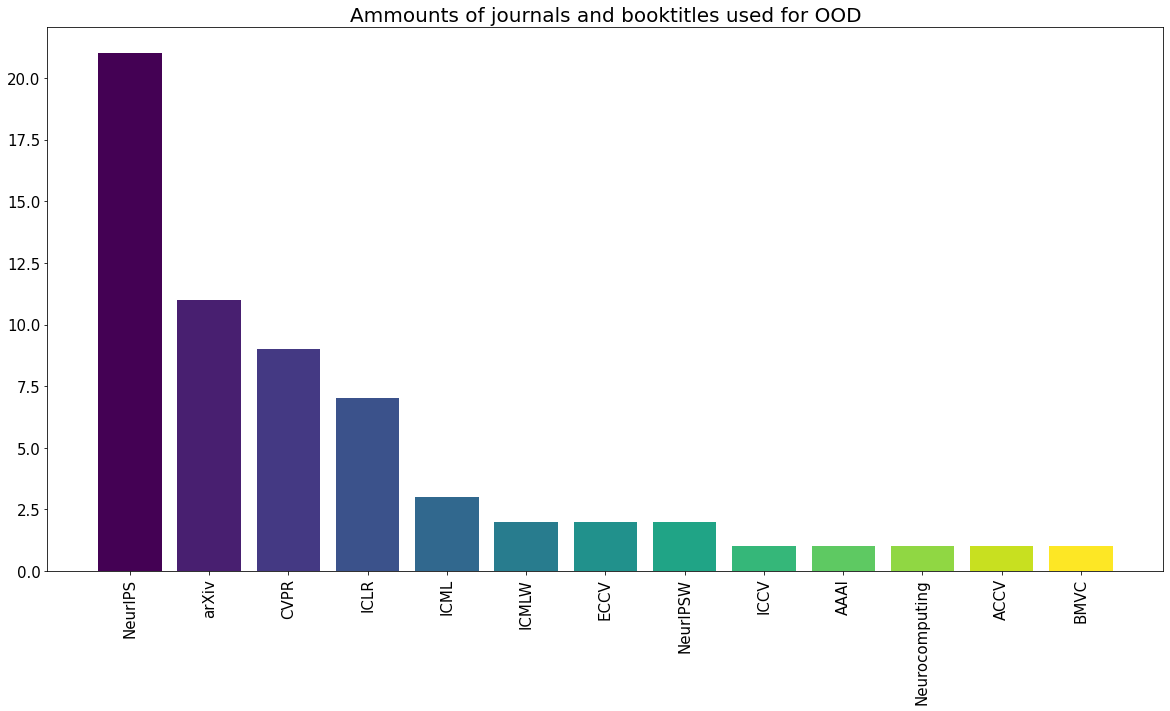

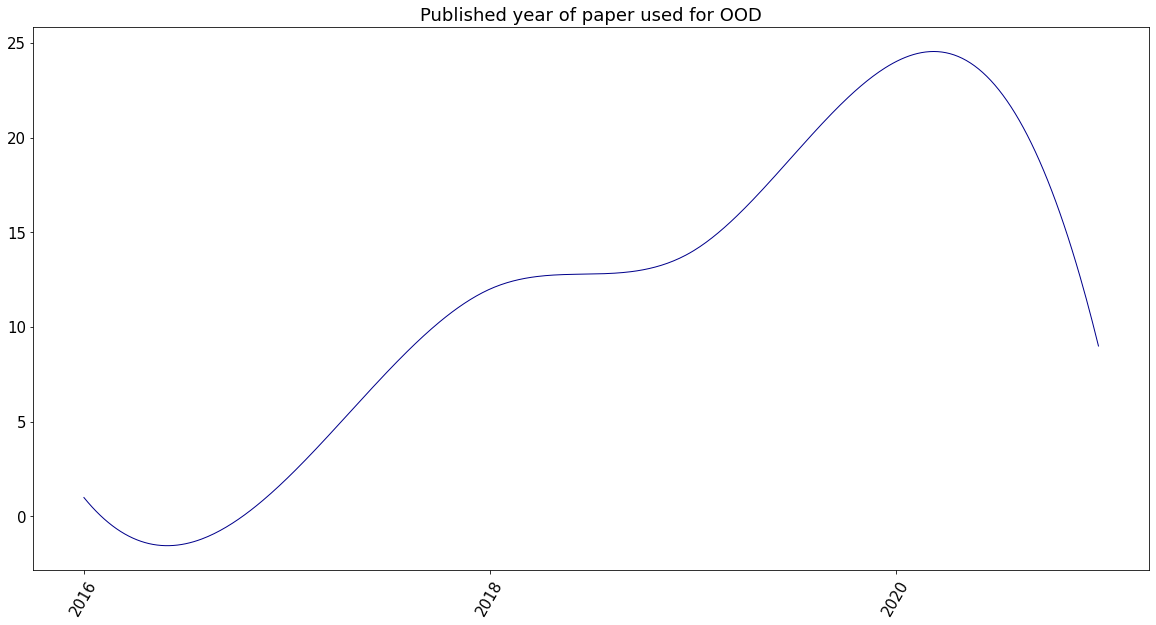

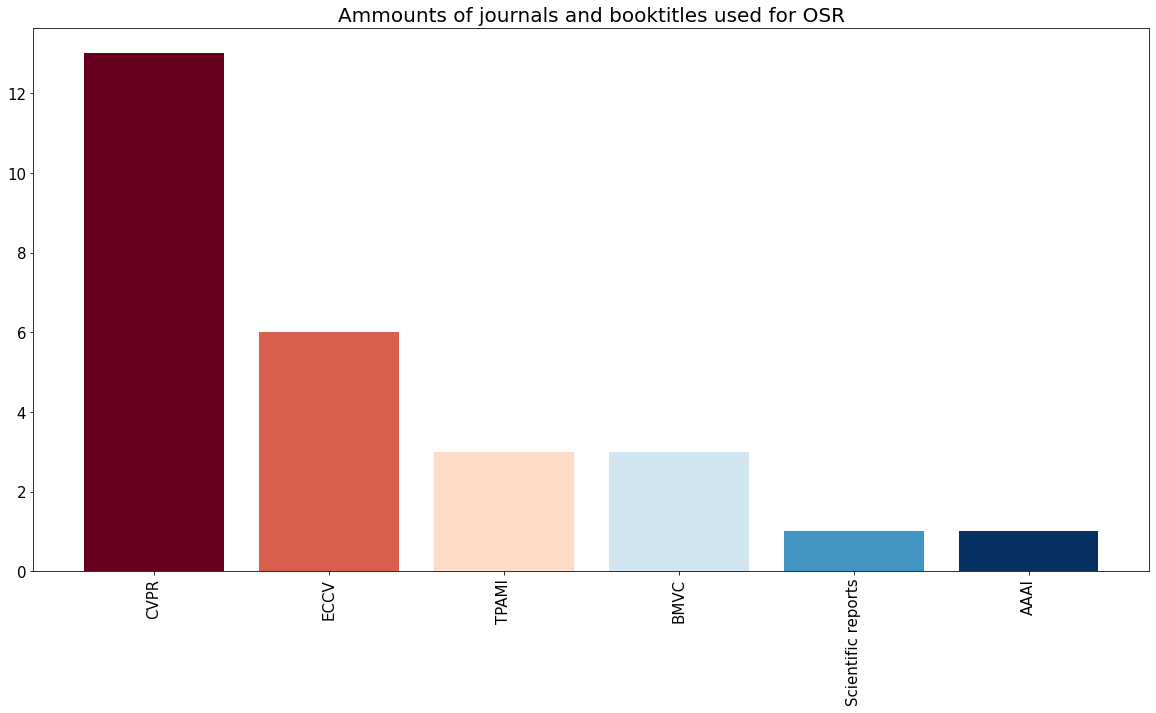

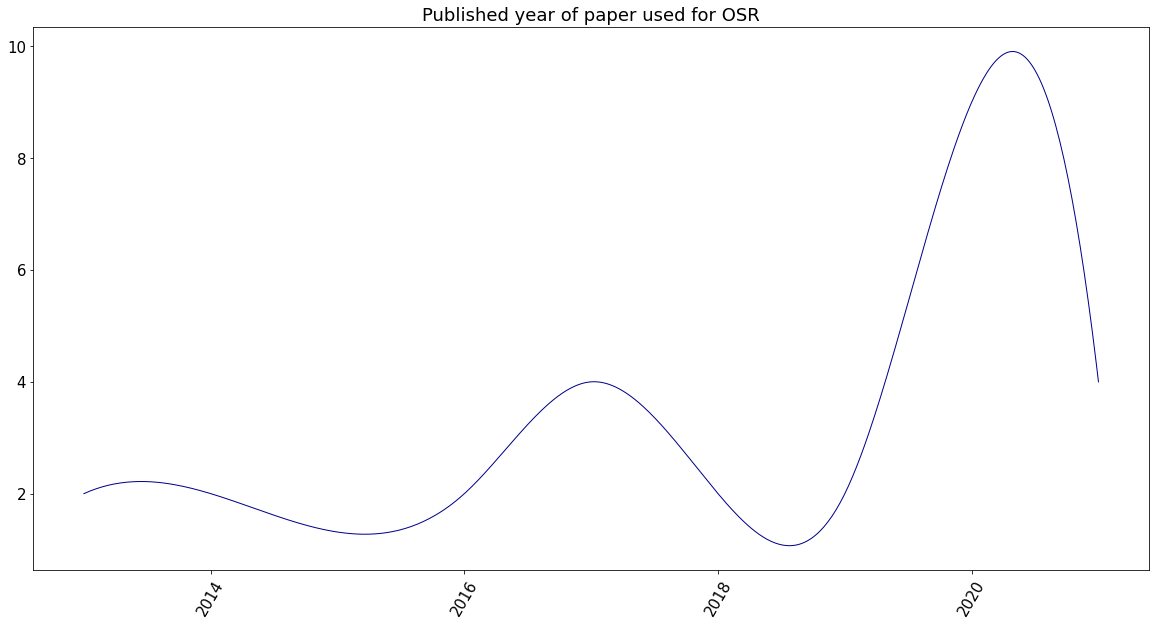

In [65]:
file = ['AD.md', 'OOD.md', 'OSR.md']
colors = ["plasma", "viridis", "RdBu"]
for id, name in enumerate(file):
    d = DataVisualization()
    journal, year = d.extract_data(name)
    d.get_dummies(journal, year)
    d.journal_bar_plot(colors[id])
    d.year_line_chart("darkblue")